In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import model_selection

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


this could either be a classical regression problem or a classification problem

In [5]:
print(df.shape)

(1599, 12)


In [6]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [7]:
df.loc[:,'quality'] = df.quality.map(quality_mapping)

nueral network or decision tree

In [8]:
#shuffling the dataframe
df=df.sample(frac=1).reset_index(drop=True) #fraction =1, return the whole dataset

#top 1000 rows selected
df_train = df.head(1000)

#bottom 599 values are selected for testing and validation
df_test = df.tail(599)

decision tree

In [9]:
from sklearn import tree
from sklearn import metrics

In [10]:
#initialize decision tree classifier class
#with a max_depth of 3

clf = tree.DecisionTreeClassifier(max_depth=3)

#choose the columns you want to train on
#these are the features for the model
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',  'chlorides', 
        'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates',  
        'alcohol'] 

#train the model on the provided features
#add mapped quality from before
clf.fit(df_train[cols],df_train.quality)

#accuracy
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

print(train_accuracy, test_accuracy)

0.58 0.5559265442404007


cross validation

In [11]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

train_accuracies = [0.5]
test_accuracies = [0.5]

In [12]:
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',  'chlorides', 
        'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates',  
        'alcohol'] 
    clf.fit(df_train[cols],df_train.quality)
    
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

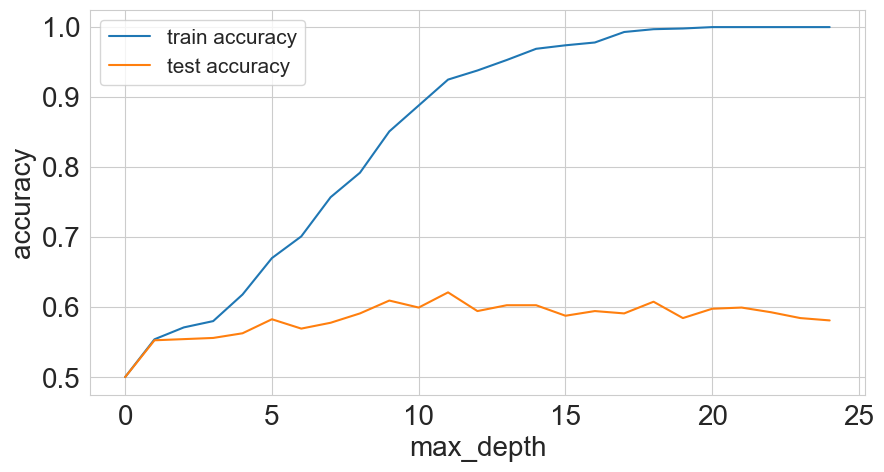

In [13]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")

plt.legend(loc = 'upper left',prop={'size':15})
plt.xlabel('max_depth',size=20)
plt.ylabel('accuracy',size=20)

plt.show()

test accuracies do not improve; it is called overfitting; it does not generalize on unseen data

Another definition of overfitting would be when the  test loss increases as we keep improving training loss. This is very common when  it comes to neural networks.  

Whenever we train a neural network, we must monitor loss during the training time for both training and test set. If we have a very large network for a dataset which is quite small (i.e. very less number of samples), we will observe that the loss for both training and test set will decrease as we keep training. 

However, at some point, test  loss will reach its minima, and after that, it will start increasing even though training loss decreases further. We must stop training where the validation loss reaches its minimum

Thakur, Abhishek. Approaching (Almost) Any Machine Learning Problem (p. 20). Abhishek Thakur. Kindle Edition. 

#### types of cross validation techniques

1. k-fold cross validation: **kf = model_selection.KFold(n_splits=5) kf.split(X=df)**
2. stratified k-fold cross validation: **kf = model_selection.StratifiedKFold(n_splits=5)kf.split(X=df,y=y)**
3. hold-out based validation
4. leave one out cross validation
5. group k-fold cross validation

### k-fold

In [14]:
if __name__=="__main__":
    df = df
    df['kfold'] = -1
    
    df = df.sample(frac=1).reset_index(drop=True)  ##sampling data
    
    kf=model_selection.KFold(n_splits=5)  ##5 folds function
    
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):  ## fold will be 0,1,2,3,4 and (train_index, validation_index)
        df.loc[val_,'kfold'] = fold
    
    df.to_csv("train_folds.csv", index=False)
    
    ## the returning file is a csv with indicator for index column indicating the number of folds

In [15]:
df_fold = pd.read_csv("train_folds.csv")
df_fold.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,13.7,0.415,0.68,2.90,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,3,0
1,12.0,0.450,0.55,2.00,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,3,0
2,8.2,0.590,0.00,2.50,0.093,19.0,58.0,1.00020,3.50,0.65,9.3,3,0
3,7.0,0.600,0.12,2.20,0.083,13.0,28.0,0.99660,3.52,0.62,10.2,4,0
4,9.3,0.270,0.41,2.00,0.091,6.0,16.0,0.99800,3.28,0.70,9.7,2,0
5,5.4,0.580,0.08,1.90,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,3,0
6,9.6,0.680,0.24,2.20,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,2,0
7,6.8,0.560,0.22,1.80,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,3,0
8,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0,0
9,7.5,0.530,0.06,2.60,0.086,20.0,44.0,0.99650,3.38,0.59,10.7,3,0


### stratified k-fold
Stratified k-fold is commonly used for classification problems to ensure that each fold maintains roughly the same proportion of samples for each class as in the complete dataset.<br>

90% positive samples and 10% negative samples <br>
you dont want to use random k-fold <br>
the data is highly imbalanced, standard k-fold might end up with all positives samples <br>

stratified k-fold keeps the ratio of labels in each fold samples <br>
so in each fold, you will have 90% positives and 10% negatives <br>

we can't use this for **regression problems**; regressions don't have discrete classes. Instead, we have continuous target variables; it needs additional variations <br>
Implementation:<br>

Divide the target variable range into bins (e.g., quartiles or deciles).<br>
Assign each data point to a bin based on its target value.<br>
Use these bins as "pseudo-classes" for stratification.<br>

if we have large amount of data, we could just divide into 10-20 bins <br>
if we have small amount of data, use **Strurge's rule** <br>

number of bins = 1+ log2(N)

In [16]:
if __name__ == "__main__":
    df = df
    df['kfold']=-1
    
    df = df.sample(frac=1).reset_index(drop=True)
    
    #fetch targets
    target = 'quality'
    y = df[target].values
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for f, (train_index, val_index) in enumerate(kf.split(X=df,y=y)):
        df.loc[val_index, 'kfold'] = f
        
    df.to_csv("train_folds", index=False)

Text(0, 0.5, 'count')

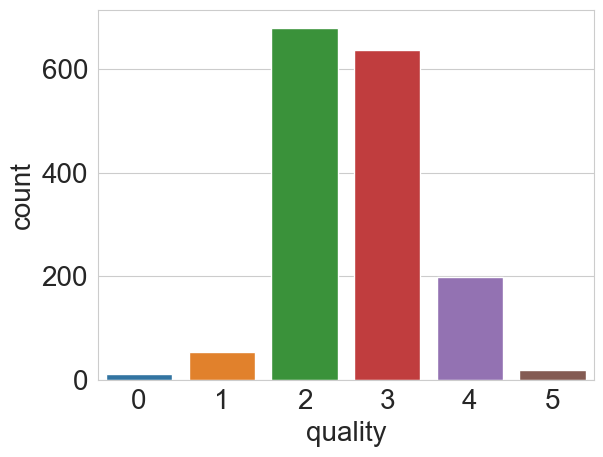

In [17]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [26]:
#### regression with stratified k fold

from sklearn import datasets

def create_folds(data):
    data["kfold"] = -1
    data = data.sample(frac=1).reset_index(drop=True) #shuffling data
    
    num_bins = int(np.floor(1+np.log2(len(data)))) #decides number of bins
    
    data.loc[:,"bins"] = pd.cut(data['target'], bins=num_bins, labels=False) #pd cut will create the bins based on min and max of target and num of bins
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    for f, (train_index, val_index) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[val_index,'kfold']  = f
    
    data = data.drop("bins", axis=1)
    return data

if __name__ == "__main__":
    x,y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)
    
    df = pd.DataFrame(x, columns = [f"f_{i}" for i in range(x.shape[1])])
    
    df.loc[:,"target"] = y
    
    df = create_folds(df)

In [27]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-1.306439,-1.166707,-0.477558,-1.474621,-0.028015,-0.186999,0.898106,1.002693,-0.004682,1.129154,...,-0.689474,-0.123203,-0.030742,-0.038713,-0.992566,-1.060481,0.004055,1.113171,-423.073963,0
1,-0.870136,0.522019,1.540845,-0.576301,0.199903,-1.417190,-1.385538,-0.082592,-0.865386,0.046364,...,0.261918,1.469892,0.034082,-1.310420,-0.747041,-1.903537,-0.167017,-1.171025,-86.612763,0
2,-0.440152,-0.768249,-0.814350,-0.007858,0.864335,0.328652,0.127439,-1.197983,-1.579589,-0.036969,...,-0.206968,0.829530,0.913704,-0.775074,0.668730,0.012751,-0.125231,1.623173,115.811482,0
3,-1.423215,-2.305800,0.195435,-0.172175,-1.064442,-1.346843,0.997859,0.391155,-1.205516,0.023239,...,-0.486604,-0.668725,0.694981,0.186520,-0.394280,0.079484,0.557677,-1.172920,-209.064961,0
4,0.714681,-0.960066,0.693335,-0.605885,0.742390,-0.071103,1.588846,-0.231031,0.018578,0.796832,...,0.049403,-0.192375,0.097292,-0.996825,-1.849239,-0.137614,0.534040,0.303464,28.142518,0


In [28]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

##The bins will be:
# (0.994, 3.0]  (The lower bound is slightly less than 1 to include 1)
# (3.0, 5.0]
# (5.0, 7.0]

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

### hold out based validation
when we have a large amount of data, training and validation could be expensive <br>
we opt for hold out based validation <br>

create the hold out remains the same as stratified k-fold, but we will keep one fold as hold out <br>

it is used very frequently with time series data

### leave one out cross validation

when deal with small datasets <br>
we opt for a k-fold cross validation k=N (N is sample size)

we will train on N-1 and validation on 1 each round

### group k-fold cross validation

in classification problem of skin cancer for example, one patience will have multiple 